In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

# 1. Data Reading

In [2]:
# import telecom dataset into a pandas data frame
df = pd.read_csv('data\Telco-Customer-Churn.csv')

# visualize column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
# check unique values of each column
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

# 2. Exploratory Data Analysis and Data Cleaning

In [4]:

# summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# transform the column TotalCharges into a numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
# null observations of the TotalCharges column
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [7]:
# drop observations with null values
df.dropna(inplace=True)

In [8]:
	# drop the customerID column from the dataset
df.drop(columns='customerID', inplace=True)

In [9]:
# unique elements of the PaymentMethod column
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [10]:
# remove (automatic) from payment method names
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)


In [11]:
# unique elements of the PaymentMethod column after the modification 
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

# 3. Data Visualization

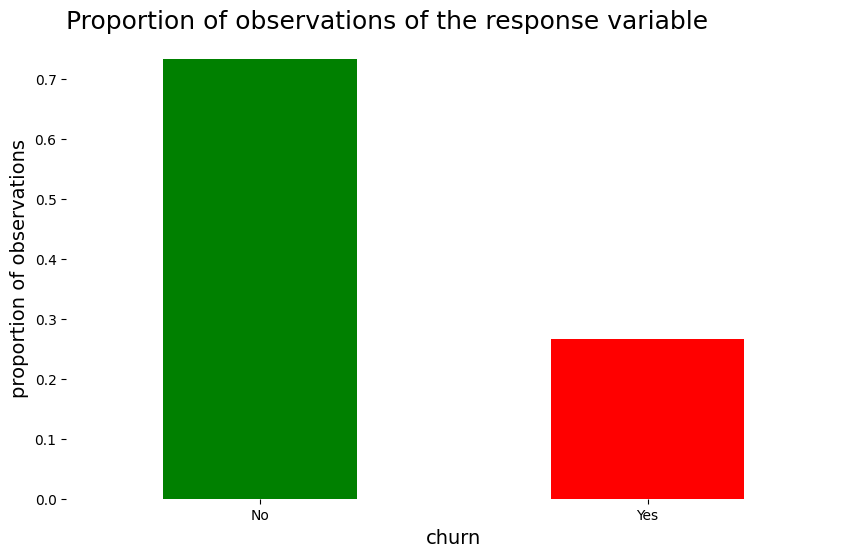

In [12]:
# create a figure
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = df['Churn'].value_counts(normalize=True)

# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['green','red'])

# set title and labels
ax.set_title('Proportion of observations of the response variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')

# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

## Demographic Information


In [13]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['green','red'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

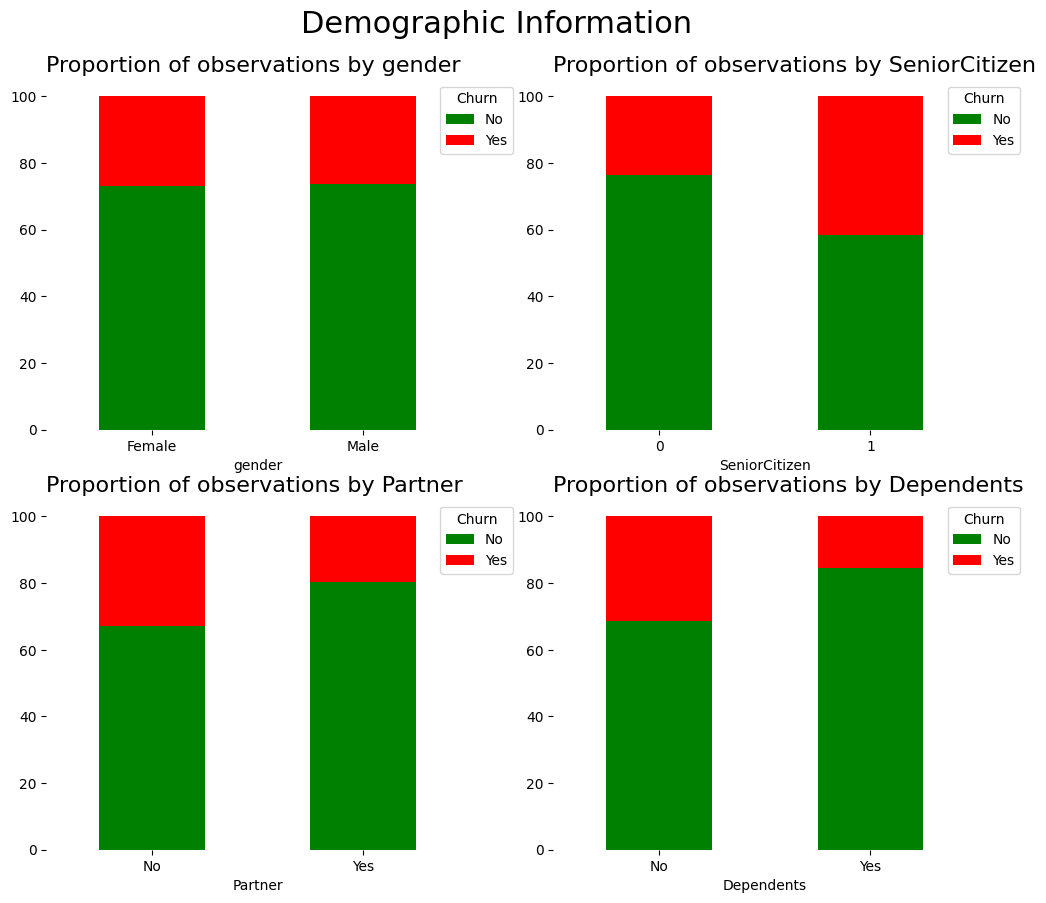

In [14]:
# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

## Customer Account Information — Categorical variables

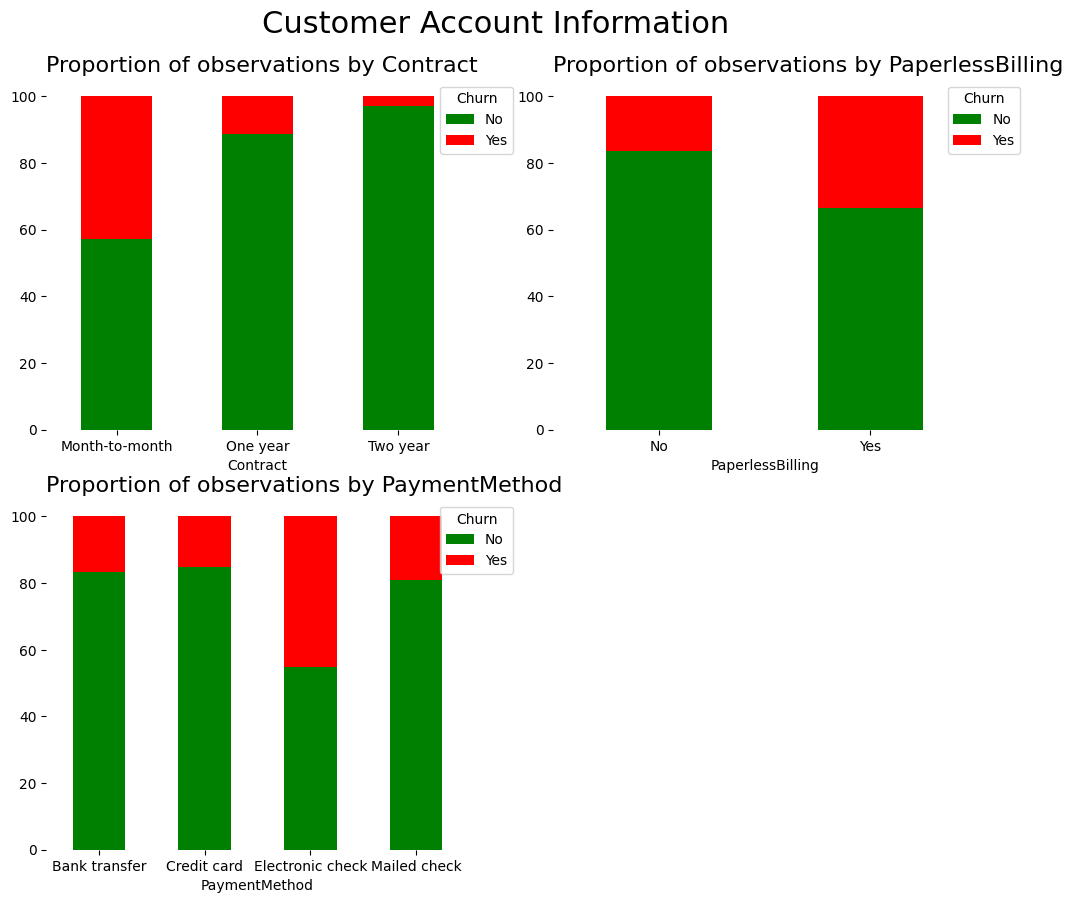

In [15]:
# customer account column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

## Customer Account Information — Numerical variables

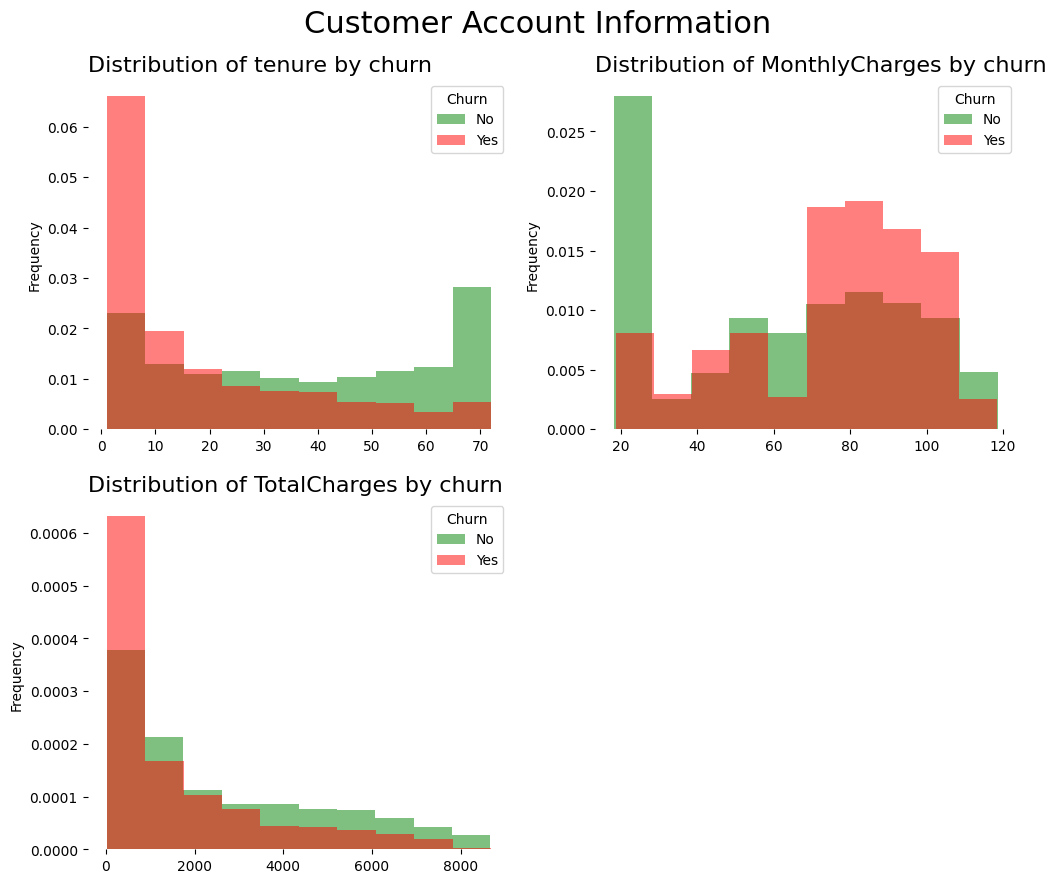

In [16]:
import matplotlib.pyplot as plt
import math

def histogram_plots(df, columns_to_plot, super_title):
    '''
    Prints a histogram for each independent variable of the list columns_to_plot.

            Parameters:
                    df (DataFrame): The DataFrame containing the data
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization

            Returns:
                    None
    '''
    # set number of rows and number of columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot) / 2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22, y=.95)

    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        df[df['Churn'] == 'No'][column].plot(kind='hist', ax=ax, density=True,
                                                       alpha=0.5, color='green', label='No')
        df[df['Churn'] == 'Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='red', label='Yes')

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

# Example usage (assuming you have a DataFrame named 'df')
# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
# histogram of costumer account columns
histogram_plots(df, account_columns_numeric, 'Customer Account Information') 
plt.show() 

## Services Information

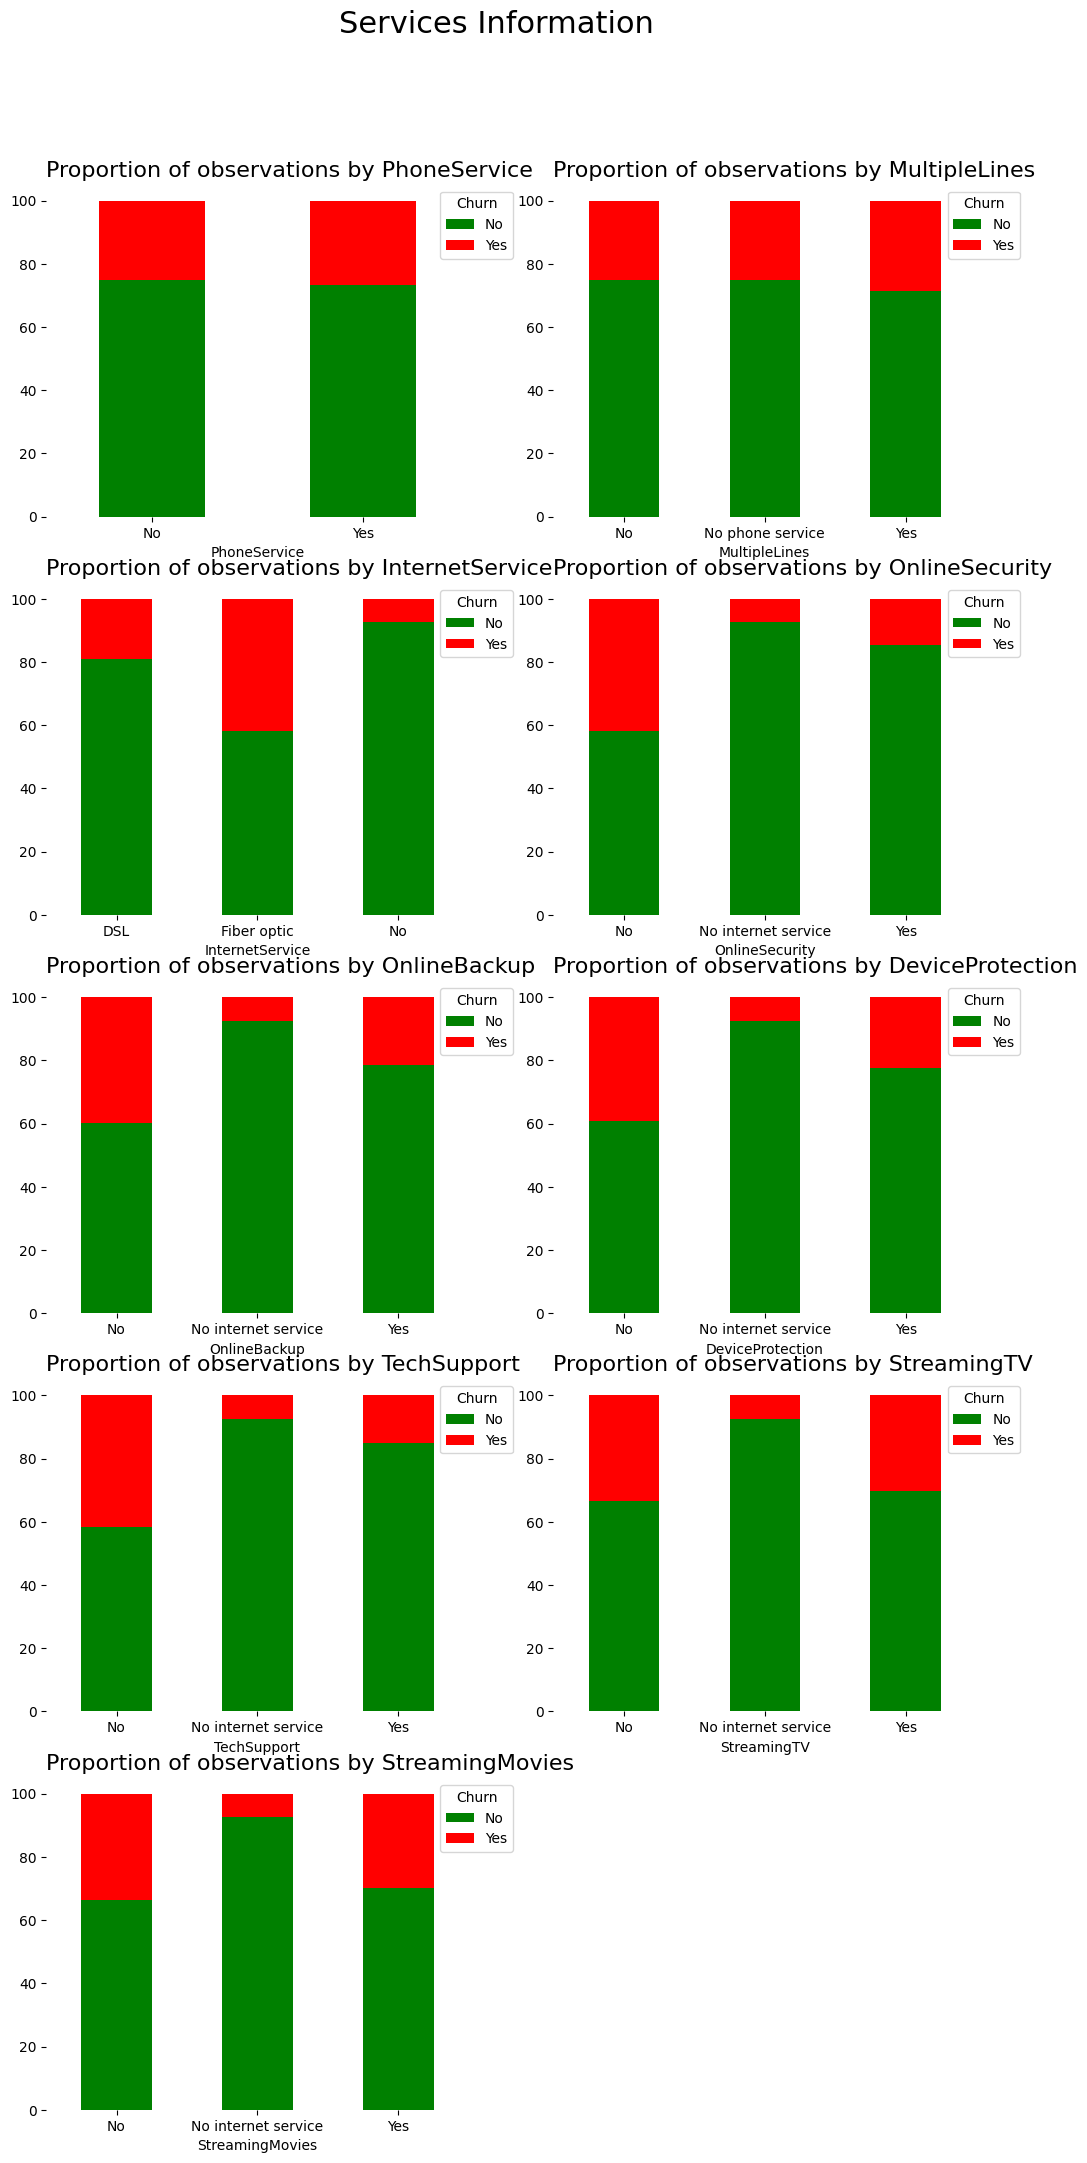

In [17]:
# services column names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information')

# 4. Feature importance

In [18]:
# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.Churn)

# select categorial variables excluding the response variable 
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


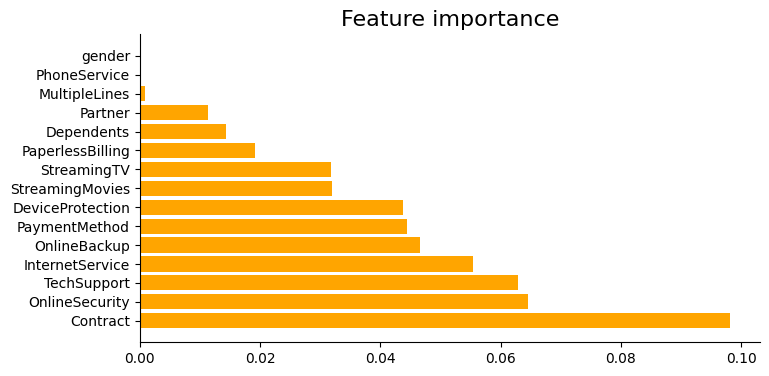

In [19]:
# visualize feature importance
plt.figure(figsize=(8, 4))  # Adjust figure size if needed
plt.barh(feature_importance.index, feature_importance.values, color='orange')
plt.title('Feature importance', fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# 5. Feature Engineering

In [20]:
df_transformed = df.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df_transformed[column] = df_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        df_transformed[column] = df_transformed[column].map({'Yes': 1, 'No': 0}) 

In [21]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_transformed = pd.get_dummies(df_transformed, columns = one_hot_encoding_columns)

In [22]:
df_transformed['AverageMonthlyCharges'] = df_transformed['TotalCharges'] / df_transformed['tenure']

## Normalization

In [23]:
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'AverageMonthlyCharges', 'MonthlyCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_transformed[column].min()
        # maximum value of the column
        max_column = df_transformed[column].max()
        # min max scaler
        df_transformed[column] = (df_transformed[column] - min_column) / (max_column - min_column)

# 7. Splitting the data in training and testing sets

In [24]:
# select independent variables
X = df_transformed.drop(columns=['Churn', 'TotalCharges', 'tenure'])

# select dependent variables
y = df_transformed.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
    

Then, we can use the `train_test_split` function from the `sklearn.model_selection` package to create both the training and testing sets.

In [25]:
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, shuffle=True)

# Apply scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

# 8. Assessing multiple algorithms

In [26]:
from sklearn.ensemble import AdaBoostClassifier 
from lightgbm import LGBMClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek 
from imblearn.over_sampling import SMOTE

In [34]:

def create_models(seed=42):
        models = []
        models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
        models.append(('k_nearest_neighbors', KNeighborsClassifier()))
        models.append(('logistic_regression', LogisticRegression(random_state=seed, solver='liblinear', max_iter=1000)))
        models.append(('support_vector_machines', SVC(random_state=seed)))
        models.append(('random_forest', RandomForestClassifier(random_state=seed)))
        models.append(('adaBoost', AdaBoostClassifier(random_state=seed)))
        models.append(('lgbm', LGBMClassifier(random_state=seed, force_row_wise=True)))
        models.append(('smote_gradient_boosting', Pipeline([
        ('oversampler', SMOTE(random_state=seed)),
        ('classifier', GradientBoostingClassifier(random_state=seed))
        ])))
        models.append(('adasyn_gradient_boosting', Pipeline([
        ('oversampler', ADASYN(random_state=seed)),
        ('classifier', GradientBoostingClassifier(random_state=seed))
        ])))
        models.append(('smotetomek_gradient_boosting', Pipeline([
        ('sampler', SMOTETomek(random_state=seed)),
        ('classifier', GradientBoostingClassifier(random_state=seed))
        ])))
        models.append(('adasyn_rf', Pipeline([
        ('oversampler', ADASYN(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
        ])))
        models.append(('smotetomek_rf', Pipeline([
        ('sampler', SMOTETomek(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
        ])))
        cost_matrix = {0: 1, 1: 2} 
        models.append(('cost_sensitive_rf', Pipeline([
        ('classifier', RandomForestClassifier(random_state=42, class_weight=cost_matrix))
        ])))

        models.append(('smote_adaboost', Pipeline([
        ('oversampler', SMOTE(random_state=42)),
        ('classifier', AdaBoostClassifier(random_state=42))
        ])))
                        
        return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
# Evaluate each model
results = []
names = []
for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)

    # Generate classification report and confusion matrix
    class_report = classification_report(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)

    # Append results
    results.append(accuracy)
    names.append(name)

    # Print results
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", conf_matrix)
    print("-" * 50)  # Separator between models 

Classifier: dummy_classifier
Accuracy: 0.7342
Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407

Confusion Matrix:
 [[1033    0]
 [ 374    0]]
--------------------------------------------------
Classifier: k_nearest_neighbors
Accuracy: 0.7399
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1033
           1       0.51      0.52      0.52       374

    accuracy                           0.74      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407

Confusion Matrix:
 [[846 187]
 [179 195]]
--------------------------------------------------
Classifier: l

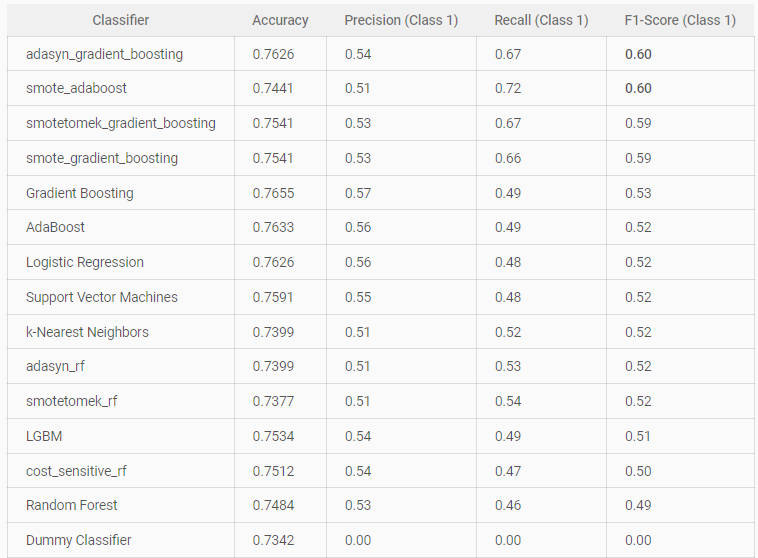
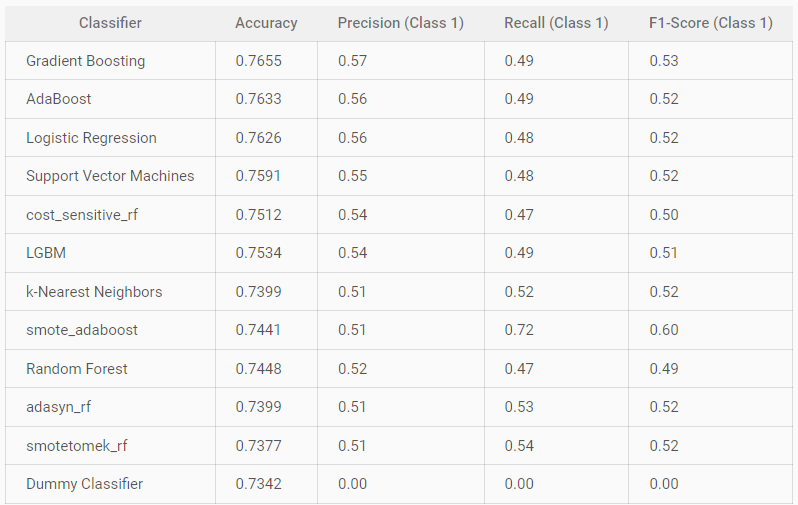
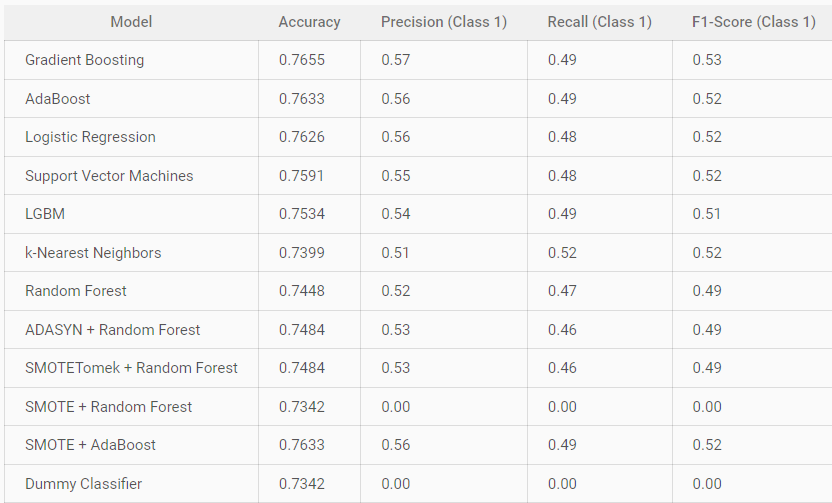

# 10. Hyperparameter tuning

Bayesian Optimization

In [41]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, make_scorer, recall_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


# Define the objective function for hyperopt (reusable for both models)
def objective(params, model_type):
    if model_type == 'gradient_boosting':
        classifier = GradientBoostingClassifier(**params, random_state=42)
    elif model_type == 'adaboost':
        classifier = AdaBoostClassifier(**params, random_state=42)
    else:
        raise ValueError("Invalid model_type. Choose 'gradient_boosting' or 'adaboost'.")

    # Create the pipeline (resampling is specific to each model)
    if model_type == 'gradient_boosting':
        model = Pipeline([
            ('oversampler', ADASYN(random_state=42)),
            ('classifier', classifier)
        ])
    elif model_type == 'adaboost':
        model = Pipeline([
            ('oversampler', SMOTE(random_state=42)),
            ('classifier', classifier)
        ])
        
    recall_scorer = make_scorer(recall_score, average=None, labels=[1])
    # Use StratifiedKFold for cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Calculate the cross-validated F1-score
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=recall_scorer)
    mean_recall_1 = cv_scores.mean()

    # hyperopt minimizes, so we return negative F1
    return {'loss': -mean_recall_1, 'status': STATUS_OK}

# Define hyperparameter search spaces (specific to each model)
gb_space = {
    'n_estimators': hp.choice('n_estimators', [50, 100, 200, 300, 500]),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),
    'max_depth': hp.choice('max_depth', range(3, 11)), 
    'min_samples_split': hp.choice('min_samples_split', [2, 5, 10, 20])
}

ada_space = {
    'n_estimators': hp.choice('n_estimators', [50, 100, 200, 300, 500]),
    'learning_rate': hp.uniform('learning_rate', 0.01, 1.0) 
}

# Optimize each model
best_models = {}
for model_type, space in [('gradient_boosting', gb_space), ('adaboost', ada_space)]:
    trials = Trials()
    best = fmin(fn=lambda params: objective(params, model_type),
                space=space,
                algo=tpe.suggest,
                max_evals=50,
                trials=trials)
    print(f"Best Hyperparameters for {model_type}: {best}")
    best_models[model_type] = best

100%|██████████| 50/50 [30:40<00:00, 36.81s/trial, best loss: -0.8234113712374581]
Best Hyperparameters for gradient_boosting: {'learning_rate': 0.01604536515445866, 'max_depth': 0, 'min_samples_split': 1, 'n_estimators': 0}
100%|██████████| 50/50 [06:09<00:00,  7.39s/trial, best loss: -0.8889632107023411]
Best Hyperparameters for adaboost: {'learning_rate': 0.012020679440647615, 'n_estimators': 0}


# 11. Performace of the model

In [42]:
# Train and evaluate the best models
results = []
names = []
for model_type, best_params in best_models.items():
    if model_type == 'gradient_boosting':
        # Correct interpretation of hyperopt results for Gradient Boosting
        classifier = GradientBoostingClassifier(
            learning_rate=best_params['learning_rate'],
            max_depth=range(3, 11)[best_params['max_depth']],  # Get the actual max_depth value
            min_samples_split=[2, 5, 10, 20][best_params['min_samples_split']],  # Get the actual min_samples_split
            n_estimators=[50, 100, 200, 300, 500][best_params['n_estimators']],  # Get the actual n_estimators
            random_state=42
        )
        model = Pipeline([
            ('oversampler', ADASYN(random_state=42)),
            ('classifier', classifier)
        ])
    elif model_type == 'adaboost':
        # Correct interpretation of hyperopt results for AdaBoost
        classifier = AdaBoostClassifier(
            learning_rate=best_params['learning_rate'],
            n_estimators=[50, 100, 200, 300, 500][best_params['n_estimators']],  # Get the actual n_estimators
            random_state=42
        )
        model = Pipeline([
            ('oversampler', SMOTE(random_state=42)),
            ('classifier', classifier)
        ])

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    class_report = classification_report(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)

    results.append(accuracy)
    names.append(model_type)

    print(f"Classifier: {model_type}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", conf_matrix)
    print("-" * 50) 

Classifier: gradient_boosting
Accuracy: 0.6923
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.65      0.75      1033
           1       0.46      0.82      0.59       374

    accuracy                           0.69      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.79      0.69      0.71      1407

Confusion Matrix:
 [[667 366]
 [ 67 307]]
--------------------------------------------------
Classifier: adaboost
Accuracy: 0.6375
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.55      0.69      1033
           1       0.41      0.87      0.56       374

    accuracy                           0.64      1407
   macro avg       0.67      0.71      0.63      1407
weighted avg       0.79      0.64      0.66      1407

Confusion Matrix:
 [[571 462]
 [ 48 326]]
--------------------------------------------------


Let's illustrate with a hypothetical example:

Scenario:

You run a subscription-based streaming service.
Cost of a False Negative (Missed Churner): $100 (estimated lost revenue from a churned customer).
Cost of a False Positive (Unnecessary Retention Offer): $10 (cost of a promotional discount).
Analysis:

Gradient Boosting:

Expected Cost of False Negatives: 67 (FN) * $100/FN = $6700
Expected Cost of False Positives: 366 (FP) * $10/FP = $3660
Total Expected Cost: $6700 + $3660 = $10360
AdaBoost:

Expected Cost of False Negatives: 48 (FN) * $100/FN = $4800
Expected Cost of False Positives: 462 (FP) * $10/FP = $4620
Total Expected Cost: $4800 + $4620 = $9420
Interpretation:

In this scenario, AdaBoost would be slightly more acceptable because its total expected cost ($9420) is lower than Gradient Boosting's ($10360).
Even though AdaBoost has lower accuracy and precision, its higher recall leads to fewer missed churners, which saves more money in this example.
Key Points:

This is a simplified example. In reality, you'd need to consider more factors, such as the effectiveness of your retention efforts, the long-term impact of false positives on customer relationships, and the potential for future revenue from retained customers.
The acceptable thresholds for accuracy and recall will change if the costs change. If the cost of retention is higher, Gradient Boosting might become the better option.
Recommendations:

Work with your business team to estimate the actual costs of false negatives and false positives.
Use those costs to calculate the expected value of different models.
Choose the model that minimizes expected cost or maximizes expected profit, based on your business goals.
Continuously monitor and evaluate your model's performance. As your business and customer behavior change, you may need to adjust your model, cost estimates, or acceptable thresholds.